In [1]:
import seaborn                   # 데이타
import matplotlib.pyplot as plt  # 그래프 라이브러리

tips = seaborn.load_dataset('tips') # 팁을 지불한 손님의 정보 데이타
tips.head()   # 지불금액 / 팁 / 성별 / 흡연 / 요일 / 시간대 / 인원수

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
# 한글처리
# 한글등록 (어려운)
from matplotlib import font_manager, rc  # rc : resource

# 추가설정 - 폰트를 변경하면 -표시가 ㅁ으로 변경되기에 '-'를 변경하지 않도록 지정
plt.rcParams['axes.unicode_minus']=False 

fong_loc = "c:/Windows/Fonts/malgun.ttf" # 글꼴 경로
font_name = font_manager.FontProperties(fname=fong_loc).get_name()
# print(font_name) # 폰트매니저를 통해 인식하고 있는 글꼴 이름을 가져온다
rc('font', family=font_name) # 리소스에 글꼴을 등록


## 1. 일변량 그래프 - 하나의 변수만 사용한 그래프 (*) 히스토그램

  [예] 전체지불금액(total_bill)에 대한 그래프
  
  - 막대 그래프(범주 변수: 카테고리 / 성별)
  - 히스토그램(수치변수: 온도 / 나이)
      

Text(0, 0.5, '지불금액')

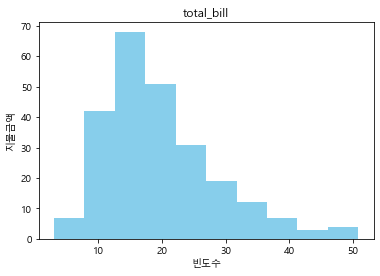

In [9]:
## 여기에 코드
plt.hist(tips['total_bill'],color='skyblue')
plt.title('total_bill')
plt.xlabel('빈도수')
plt.ylabel('지불금액')



##  2. 이변량 그래프 - 변수 2개를 이용한 그래프 ( 산점도 그래프 )
    [예] 지불금액에 따른 팁 금액을 나타내는 그래프

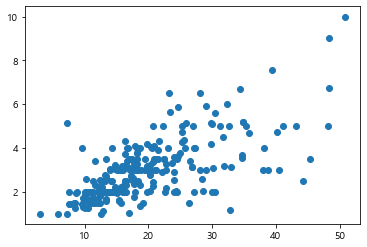

In [11]:
# 여기에 코드
plt.scatter(tips['total_bill'],tips['tip'])


## 3. 이산형 변수와 연속형 변수 - 박스플롯
    이산형 - 성별이나 국적처럼 명확하게 구분되는 값
    연속형 - 수치로 이루어진 값

    [예] 성별에 따른 팁을 나타내는 그래프

{'whiskers': [<matplotlib.lines.Line2D at 0x1714db42518>,
 'caps': [<matplotlib.lines.Line2D at 0x1714db42ba8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1714db420f0>,
 'medians': [<matplotlib.lines.Line2D at 0x1714db42fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1714db4a5c0>,
 'means': []}

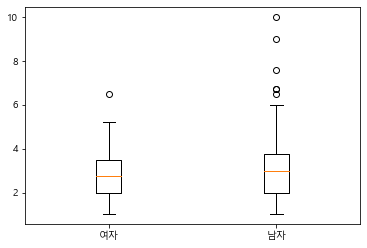

In [15]:
# 여기에 코드
female = tips[tips['sex']=='Female']['tip']
male = tips[tips['sex']=='Male']['tip']
plt.boxplot([female,male],labels=['여자','남자'])



##  4. 다변량 그래프 - 3개 이상의 변수로 그래프 - 산점도 그래프

      [예] 식사지불과 팁의 정도를 성별에 따라 그래프를 그린다면?
      
      * 성별의 문자열값을 0과 1로 변경하여 다른 색상으로 그리고자 한다

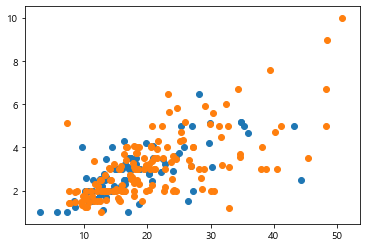

In [20]:
# (1) 성별을 0과 1로 변환하는 함수 선언
female = tips[tips['sex']=='Female'][['total_bill','tip']]
male = tips[tips['sex']=='Male'][['total_bill','tip']]

plt.scatter(female['total_bill'],female['tip'],label="여자")
plt.scatter(male['total_bill'],male['tip'],label="남자")


# (2) 변경한 성별값의 변수(컬럼 sex_color) 추가


# (3) 그래프 : x와 y 축, c=점의 색상, alpha=점의 투명도, s=점의 크기
#    테이블당의 인원수를 점의 크기로 표현한다면 s=tips['size']*10 추가


In [21]:
import numpy as np

tips['sex_color'] = np.where(tips['sex']=='Female', 0, 1)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,sex_color
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


[ 참고 ]  plt.scatter와 plt.plot 정리
